## Project: Using Boston and Seattle AirBnB  Data to Derive Insights 
### by Princewill Okechukwu

This Notebook uses the CRISP-DM methodology to derive insights for the Boston(2017) and Seattle (2016) AirBnB data .
The following Questions will be explored upon and insights would be derived.

#### Questions

1. What are the most common apartment types for both Seattle and Boston ?


2. What Neighbourhoods have the Highest rates for lisings in both Cities ?


3. What months of the year had the most bookings for both cities? 


4. Top 10 neighbourhoods with the highest grossing revenues made from bookings for both cities in those  years?.


5. In predicting AirBNB price, what model perfoms better between a model built with non-NaN data and model built with Imputed data.




#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

### Data Understanding & Preparation

#### import datasets for Seattle and Boston 

In [2]:
st_listings = pd.read_csv('Seattle/seattle_listings.csv')
st_calender = pd.read_csv('Seattle/seattle_calendar.csv')
st_reviews = pd.read_csv('Seattle/seattle_reviews.csv')
bst_listings = pd.read_csv('Boston/boston_listings.csv')
bst_calender = pd.read_csv('Boston/boston_calendar.csv')
bst_reviews = pd.read_csv('Boston/boston_reviews.csv')

#### Make copies of all the data sets for data cleaning

In [3]:
st_listings_copy = st_listings.copy()
st_calender_copy = st_calender.copy()
st_reviews_copy = st_reviews.copy()
bst_listings_copy = bst_listings.copy()
bst_calender_copy = bst_calender.copy()
bst_reviews_copy = bst_reviews.copy()

In [12]:
#st_listings[['space','review_scores_value','host_total_listings_count','host_is_superhost','neighbourhood_group_cleansed','city','state','country','property_type','room_type','bathrooms', 'bedrooms', 'beds', 'bed_type']]



In [14]:
bst_listings_copy.shape

(3585, 95)

In [12]:
bst_calender_copy.shape

(1308890, 4)

In [10]:
bst_calender_copy.listing_id.value_counts()

12898806    730
12147973    365
14553190    365
8334845     365
7869368     365
           ... 
5718801     365
9487079     365
4410142     365
8301926     365
14504422    365
Name: listing_id, Length: 3585, dtype: int64

In [6]:
st_reviews_copy.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [7]:
st_listings_copy.columns[st_listings_copy.isnull().mean() > 0.75]

Index(['square_feet', 'license'], dtype='object')

In [8]:
st_listings_copy.shape #Seattle listing dataframe has 3818 rows and 92 columns


(3818, 92)

#### columns with no missing values 

In [9]:
st_listings_copy.columns[st_listings.isnull().mean() == 0]

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_verifications', 'street', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'room_type', 'accommodates', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')

In [14]:
st_calender_copy.listing_id.value_counts()

241032      365
9299824     365
8597687     365
2309250     365
7420339     365
           ... 
4243163     365
4569115     365
4464824     365
9258513     365
10208623    365
Name: listing_id, Length: 3818, dtype: int64

#### 1. What are the 5 most common property types for both Seattle and Boston?

In [376]:

def most_common_prop(prop,name):
    """
    Input:
    prop: The City dateframe
    Name: Name of the city
    
    Output:
    Plot of the 5 Most common property type.
    
    """
    type_count = prop['property_type'].value_counts()
    (type_count[:5]/prop.shape[0]).plot(kind="bar");
    plt.title("5 Most Common Property type in {}".format(name));
    plt.xlabel('Property Type')
    plt.ylabel('Proportion')

    

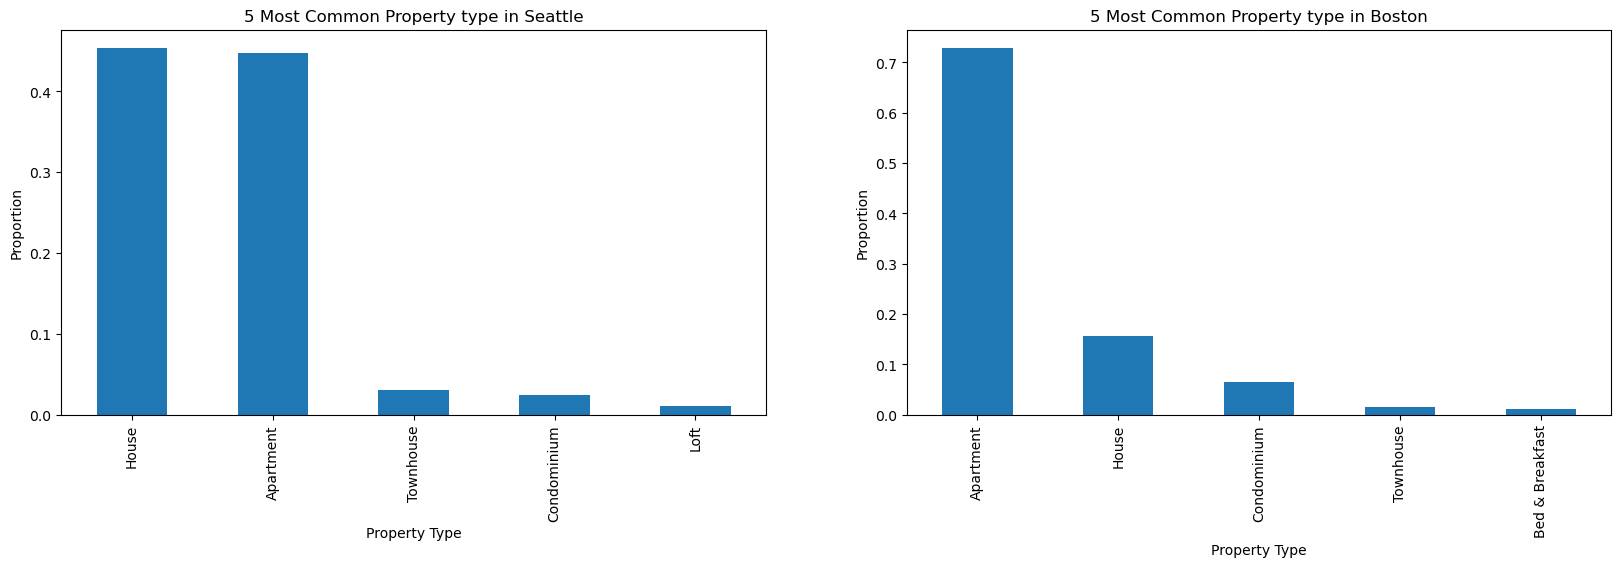

In [377]:
      
city_name = [[st_listings_copy,'Seattle'],[bst_listings_copy,'Boston']]
i=1
plt.figure(figsize=[20,5])

for city in city_name:
    plt.subplot(1,len(city_name),i)
    most_common_prop(city[0],city[1])
    i += 1   
    

Explanation:
From the visualization, it can be obsevered that the most common property type for AirBnB in Seattle were majorly House and followed closely by apartment with almost equal proportion, next were Townhouse, Condominium and Loft. 

While for Boston, Apartment was by far the most common, followed by House, Condominium,Townhouse and Bed&breakfast.


In [17]:
type_count = bst_listings_copy['property_type'].value_counts()
type_count[:5]/bst_listings_copy.shape[0]

Apartment          0.728591
House              0.156764
Condominium        0.064435
Townhouse          0.015063
Bed & Breakfast    0.011437
Name: property_type, dtype: float64

#### 2.  The 10 Most expensive Neighbourhood groups  in Seattle and Boston

In [20]:
st_listings_copy['price'].head()

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

##### Clean Price for both Cities

In [21]:

def clean_price(city):
    city['price'] = [x.strip('$') for x in city["price"]]
    city['price'] = [x.replace(',','') for x in city["price"]]
    city['price'] = city['price'].astype(float)
    
    return city['price']

cities = [st_listings_copy,bst_listings_copy]

for city in cities:
    clean_price(city)

##### rename seattle and boston neighbourhood_cleansed_group to neighbourhood final so it is homogenous

In [22]:
bst_listings_copy.rename(columns={'neighbourhood_cleansed':'neighbourhood_cleansed_final'},inplace=True)
st_listings_copy.rename(columns={'neighbourhood_group_cleansed':'neighbourhood_cleansed_final'},inplace=True)

#### Plot of Top 10 expensive Neighbourhood in both Cities 

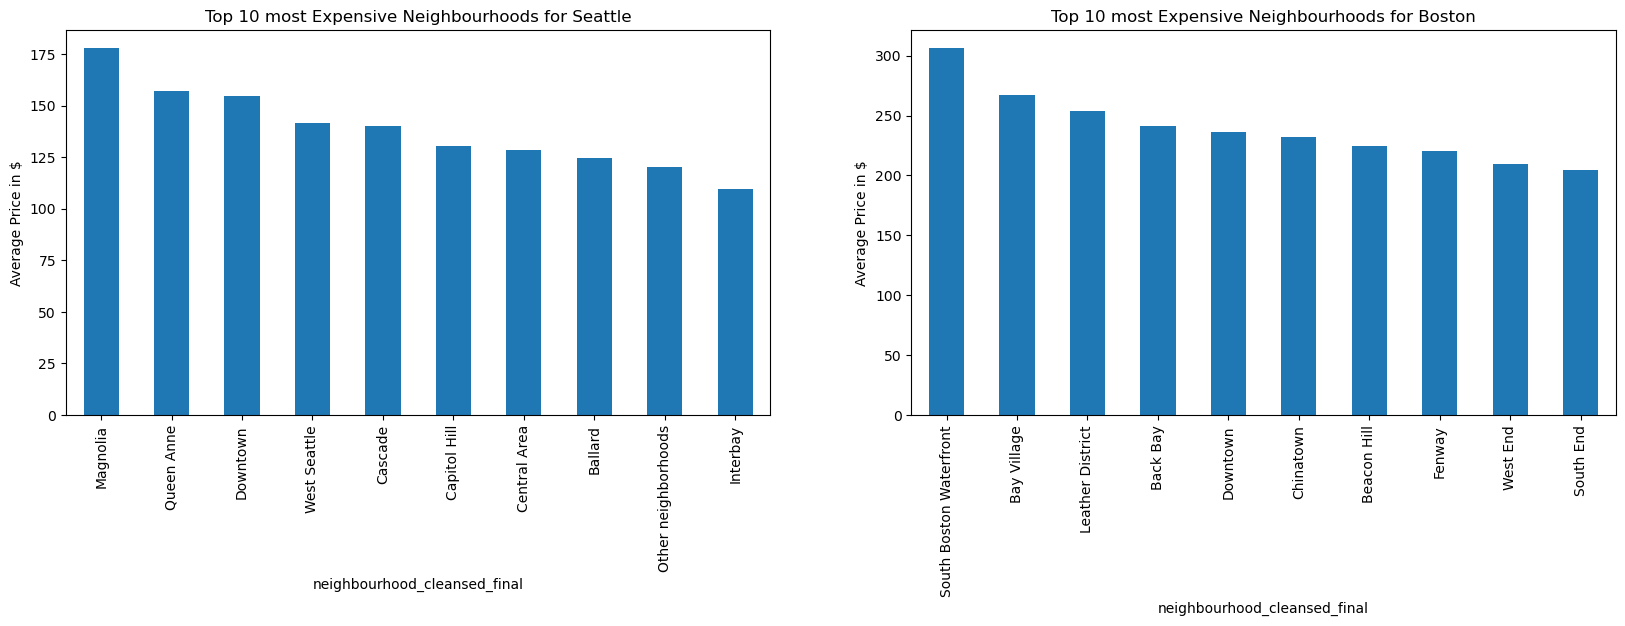

In [23]:
def area_rates(prop,name):
    """
    Input:
    prop: The City dateframe
    Name: Name of the city
    
    Output:
    Plot of the 10 Most Expensive Neighbourhood on average for each city. 
    
    """
    area_rate = prop.groupby('neighbourhood_cleansed_final')['price'].mean().sort_values(ascending=False)
    area_rate[:10].plot(kind="bar");
    plt.title('Top 10 most Expensive Neighbourhoods for {}'.format(name))
    plt.ylabel('Average Price in $')
    
city_name = [[st_listings_copy,'Seattle'],[bst_listings_copy,'Boston']]
i=1
plt.figure(figsize=[20,5])

for city in city_name:
    plt.subplot(1,len(city_name),i)
    area_rates(city[0],city[1])
    i += 1     

For Seattle , It can be seen that seen that Magnolia is the most expensive place to stay on average at about $178. While for Boston is more expensive on an average with the most Expensive being South Boston Waterfront.

In [25]:
area_rate = bst_listings_copy.groupby('neighbourhood_cleansed_final')['price'].mean().sort_values(ascending=False)
area_rate

neighbourhood_cleansed_final
South Boston Waterfront    306.060241
Bay Village                266.833333
Leather District           253.600000
Back Bay                   240.950331
Downtown                   236.459302
Chinatown                  232.352113
Beacon Hill                224.443299
Fenway                     220.393103
West End                   209.591837
South End                  204.349693
Charlestown                198.045045
North End                  195.678322
South Boston               187.609195
Roxbury                    146.333333
Jamaica Plain              138.478134
Longwood Medical Area      138.444444
Mission Hill               121.967742
East Boston                119.153333
Brighton                   118.767568
Allston                    112.307692
West Roxbury               107.108696
Roslindale                  98.428571
Dorchester                  91.639405
Hyde Park                   86.548387
Mattapan                    75.125000
Name: price, dtype: f

### 3. What Months of the Year experienced Most Bookings ?

In [26]:
st_calender_copy

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [27]:
st_calender_copy.groupby('listing_id')['available'].count()

listing_id
3335        365
4291        365
5682        365
6606        365
7369        365
           ... 
10332096    365
10334184    365
10339144    365
10339145    365
10340165    365
Name: available, Length: 3818, dtype: int64

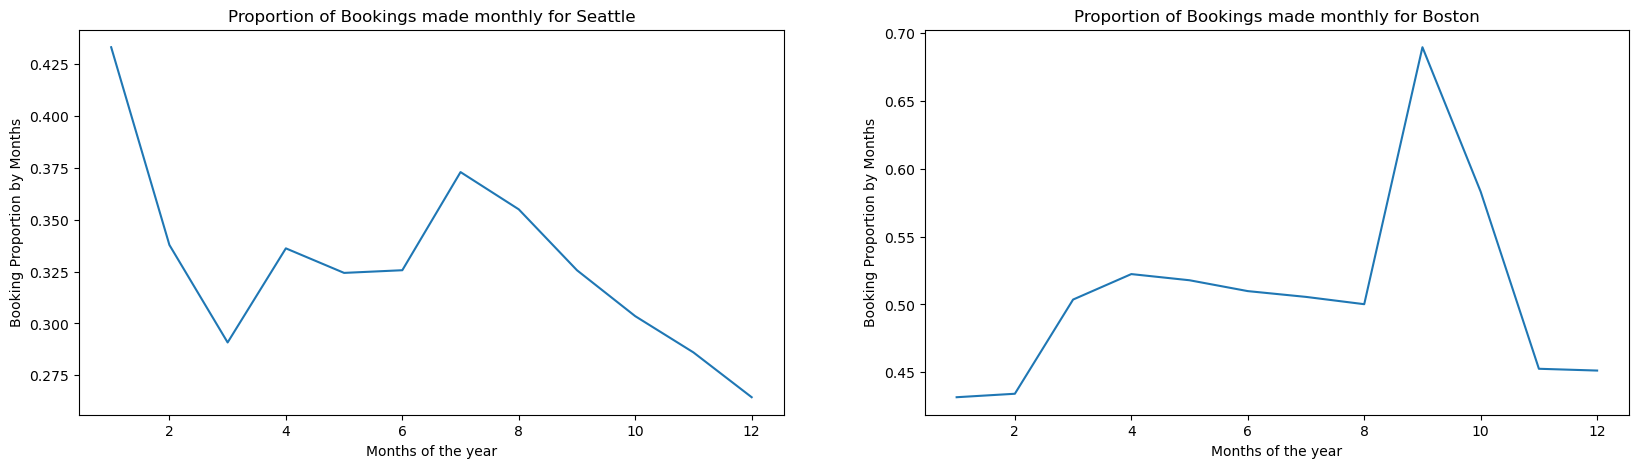

In [28]:
def monthly_booked(prop,name):
    
    """
    Input:
    prop - The City dateframe
    Name - Name of the city
    
    Output:
    Plot of the Proportion of Bookings By each Month for the year. 
    
    This Function will:
    1.Create a new column to measure booking
    2.Covert date column to datetime type
    3.Create a month column from date
    4.Group months of the year by the amount of booked times.
    5.Plot Booking proportion for each month in a line graph
    
    """
    #1.
    prop['is_booked'] = [1 if x == 'f' else 0 for x in prop['available']] 
    
    #2.
    prop['date'] = pd.to_datetime(prop['date']) 
    
    #3.
    prop['month'] = prop['date'].dt.month 
    
    #4
    booking_prop=prop.groupby('month')['is_booked'].mean()  
    
    #5
    booking_prop.plot(kind='line');
    plt.title('Proportion of Bookings made monthly for {}'.format(name))
    plt.xlabel('Months of the year')
    plt.ylabel('Booking Proportion by Months')
    
    
    
city_name = [[st_calender_copy,'Seattle'],[bst_calender_copy,'Boston']]
i=1
plt.figure(figsize=[20,5])

for city in city_name:
    plt.subplot(1,len(city_name),i)
    monthly_booked(city[0],city[1])
    i += 1

From the Line chart, It can be seen that AirBNB in Seattle were mostly booked in January, with the second peak booking period in July. After July, the rates of Booking reduces till December where Booking rates are lowest. 

While for Boston it can be seen that September is a Peak booked period ,with over 65% percent of all bookings in the year. Followed closely by October ,and then April, January recorded the lowest booked period for Boston.

### 4. Top 10 Neighbourhood By Highest Gross Revenue Made from Bookings in 2016

Assuming no discounts are offered, the Gross revenue = Fixed Price * Booked Days 

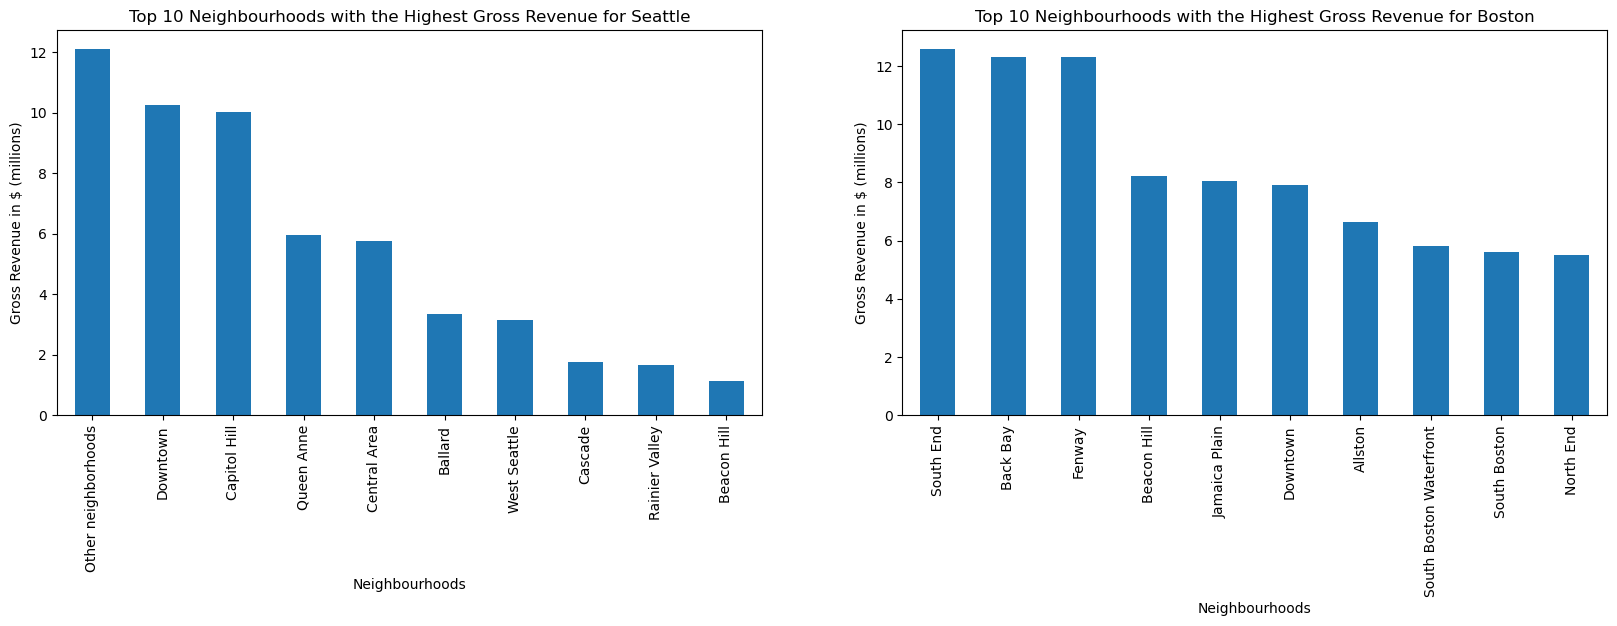

In [32]:
def highest_revenue(prop,schedule,name):
    """
    Input:
    prop - The City Dateframe
    schedule - Booking information DataFrame
    Name - Name of the city
    
    Output:
    Plot of Top 10 Neighbourhoods with the Highest Revenue made from Bookings in 2016. 
    
    This Function:
    1.Gets the number of booked days for each listing_id and creates a dataframe.
    2.Adds the booked days dataframe in 1 to listing Dataframe.
    3.Creates a booking_revenue column by Multiplying fixed price by booked_days.
    4.Groups the Neighbourhoods by Booking revenue.
    5.Creates a plot of the Top 10 Neighbourhoods with the Highest Gross Revenue
    
    
    """
    #1
    booked_count = pd.Series(schedule.groupby('listing_id')['is_booked'].sum()) 
    booked_count= pd.DataFrame(booked_count)
    booked_count.rename(columns={"is_booked":"booked_days"},inplace=True)
    
    #2
    prop = prop.join(booked_count,on='id',how='left')
    
    #3
    prop['booking_revenue'] = prop['price'] * prop['booked_days'] 
    
    #4
    gross_rev = prop.groupby('neighbourhood_cleansed_final')['booking_revenue'].sum().sort_values(ascending=False) #group Neighbourhood by Revenue
    
    #5
    (gross_rev/1000000)[:10].plot(kind='bar');
    plt.title('Top 10 Neighbourhoods with the Highest Gross Revenue for {}'.format(name))
    plt.xlabel('Neighbourhoods')
    plt.ylabel('Gross Revenue in $ (millions)')
    
    
city_name = [[st_listings_copy,st_calender_copy,'Seattle'],[bst_listings_copy,bst_calender_copy,'Boston']]
i=1
plt.figure(figsize=[20,5])

for city in city_name:
    plt.subplot(1,len(city_name),i)
    highest_revenue(city[0],city[1],city[2])
    i += 1   

From the chart of highest Gross revenues generated from AirBnB Bookings, it can be seen that in Seattle, other neighbourhoods generated a culmulative revenue of 12 million USD , followed closely by Downtown and Capitol Hill which generated approximately 10 million USD. 

While in Boston,South End, Back Bay and Fenway all were the highest generating Neighbourhoods generating approximately 12 million USD.

### Modelling

Selecting Numerical variables that are informative to price

In [33]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_st_listing = st_listings_copy.select_dtypes(include=numerics)

In [34]:
num_columns_st = st_listings_copy[['price','host_total_listings_count','accommodates','bathrooms', 'bedrooms', 'beds','guests_included', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating','review_scores_cleanliness','review_scores_communication','review_scores_location', 'review_scores_value']]

### Variable selection 

According to (Toader et al,2022; Gyodi and Nawaro,2021) the following factors have been extracted as determinants in the price of AirBnB.

Hosts involvments

Listing reputation(ratings)

Listing Location

size and quality

Rental Policies (stringency eg guestphone verification)


#### Using this guide and adding variables based on intution, Therefore the varible selection will be :
-
st_listings_copy[['host_response_time', 'host_is_superhost','host_total_listings_count',
       'host_identity_verified', 'neighbourhood_cleansed_final','room_type', 'accommodates','bedrooms','guests_included','number_of_reviews','review_scores_rating','instant_bookable','require_guest_phone_verification']]

#### CORRELATION With Price versus other Variables

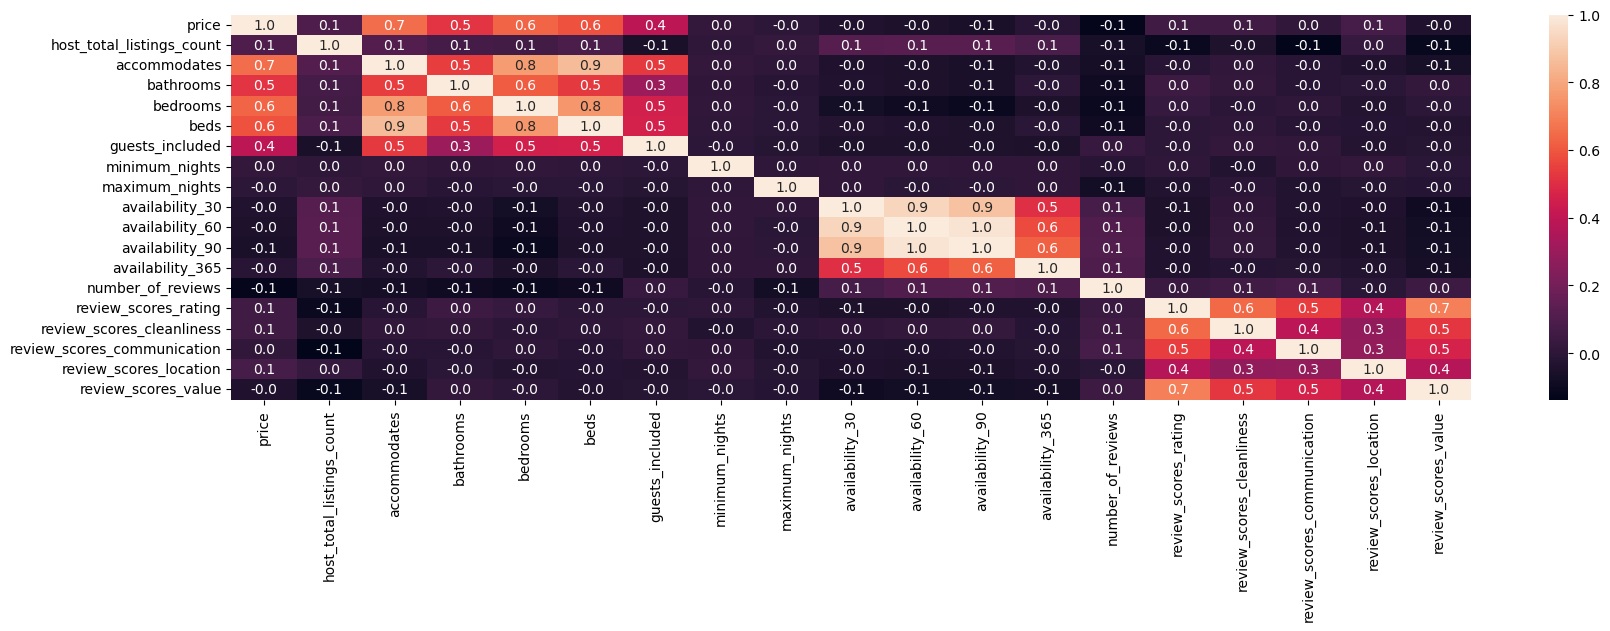

In [35]:
plt.figure(figsize=(20,5))
sns.heatmap(num_columns_st.corr(),annot=True,fmt='.1f');

To avoid multicollinearity among independent variables, we want to select variables that are correlating with price(above 0.6) , and NOT highly correlating with another independent variable (less than 0.4)

In [36]:
#Dataset subsets for modelling
st_listings_mod = st_listings_copy[['price','host_response_time', 'host_is_superhost','host_total_listings_count',
       'host_identity_verified', 'neighbourhood_cleansed_final','room_type', 'accommodates','bedrooms','guests_included','number_of_reviews','review_scores_rating','instant_bookable','require_guest_phone_verification']]
bst_listings_mod = bst_listings_copy[['price','host_response_time', 'host_is_superhost','host_total_listings_count',
       'host_identity_verified', 'neighbourhood_cleansed_final','room_type', 'accommodates','bedrooms','guests_included','number_of_reviews','review_scores_rating','instant_bookable','require_guest_phone_verification']]

#### a. Modelling data with all NAN Removed 

In [41]:
st_listings_nona = st_listings_mod.dropna()

In [42]:
st_listings_mod.shape

(3818, 14)

In [43]:
bst_listings_nona = bst_listings_mod.dropna()

In [44]:
st_listings_nona.shape

(2853, 14)

In [45]:
st_listings_mod.isnull().sum()

price                                 0
host_response_time                  523
host_is_superhost                     2
host_total_listings_count             2
host_identity_verified                2
neighbourhood_cleansed_final          0
room_type                             0
accommodates                          0
bedrooms                              6
guests_included                       0
number_of_reviews                     0
review_scores_rating                647
instant_bookable                      0
require_guest_phone_verification      0
dtype: int64

In [46]:
st_listings_mod.head()

,price,host_response_time,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed_final,room_type,accommodates,bedrooms,guests_included,number_of_reviews,review_scores_rating,instant_bookable,require_guest_phone_verification
0,85.0,within a few hours,f,3.0,t,Queen Anne,Entire home/apt,4,1.0,2,207,95.0,f,f
1,150.0,within an hour,t,6.0,t,Queen Anne,Entire home/apt,4,1.0,1,43,96.0,f,t
2,975.0,within a few hours,f,2.0,t,Queen Anne,Entire home/apt,11,5.0,10,20,97.0,f,f
3,100.0,NaN,f,1.0,t,Queen Anne,Entire home/apt,3,0.0,1,0,NaN,f,f
4,450.0,within an hour,f,2.0,t,Queen Anne,Entire home/apt,6,3.0,6,38,92.0,f,f


#### b. Modelling data with NAN to be filled 

In [47]:
st_listings_mod_fill = st_listings_mod.copy()

In [48]:
bst_listings_mod_fill = bst_listings_mod.copy()

In [49]:
bst_listings_mod_fill.shape

(3585, 14)

### First  MODEL with dropped Nan data

In [50]:
def data_non_nan(df):
    """
    Input:
    df - Pandas dataframe
    
    Output:
    X - A matrix for all independent variables
    y - The corresponding response vector 
    
    This Function will:
    1. Create X as all the columns to predict price.
    2. Create y as the price column.
    3. Create a dummy for all categorical columns and drop the original columns
    
    """
    #create dependent and response variables
    y = df['price']
    df = df.drop('price',axis=1)
    
    #Create dummy for all categorical variables
    cat_vars = df.select_dtypes(include='object').copy().columns
    
    for col in cat_vars:
        df = pd.concat([df.drop(col,axis=1),pd.get_dummies(df[col],prefix=col,prefix_sep='_',drop_first=True)],axis=1)
    
    X = df
        
    
    return X,y




In [51]:
city_data = [[st_listings_nona,'Seattle'],[bst_listings_nona,'Boston']]

for city in city_data:
    X,y = data_non_nan(city[0])
    
    #Split data into training and Test and fit linear model
    
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
    
    #instantiate
    
    lm_model = LinearRegression(normalize=True);
    
    #Fit
    
    lm_model.fit(x_train,y_train);
    
    #predict
    y_test_pred = lm_model.predict(x_test);
    
    #Score
    
    r2_test = r2_score(y_test,y_test_pred)
    print('The R-Squared value of the linear model in predicting price of AirBnB in {} is: {}'.format(city[1],r2_test))

The R-Squared value of the linear model in predicting price of AirBnB in Seattle is: 0.6609668912796074
The R-Squared value of the linear model in predicting price of AirBnB in Boston is: 0.6650118100009732


The R-Square in predicting the price for both Seattle and Boston gave relatively good high scores. This means that the independent variables used to build the model explains the variability in Price at 66% and 67% of the time respectively.

### Second Model with NaN Imputed

#### Filling Nan with the mean for numerical data and Mode for categorical data

In [52]:
def data_fill_nan(df):
    """
    Input:
    df - Pandas dataframe
    
    Output:
    X_2 - A matrix for all independent variables
    y_2 - The corresponding response vector 
    
    This Function will:
    1. Create X as all the columns to predict price.
    2. Create y as the price column.
    3. Fill Nan with Mean for Numerical data.
    4. Fill Nan with mode for categorical data
    5. Create a dummy for all categorical columns and drop the original columns    
    
    """
    #create dependent and response variables
    y_2 = df['price']
    df = df.drop('price',axis=1)
    
    #fill mean for numerical data 
    num_vars = df.select_dtypes(include=['float','int']).columns
    
    for num in num_vars:
        df[num].fillna(df[num].mean(),axis=0,inplace=True)
    
    #Fill missing values and Create dummy for all categorical variables
    cat_vars = df.select_dtypes(include='object').copy().columns

    
    for col in cat_vars:
        df[col].fillna(df[col].mode()[0],axis=0,inplace=True)
        df = pd.concat([df.drop(col,axis=1),pd.get_dummies(df[col],prefix=col,prefix_sep='_',drop_first=True)],axis=1)
    
    X_2 = df
        
    
    return X_2,y_2


In [53]:
#X_2,y_2 = data_fill_nan(st_listings_mod_fill)

city_data = [[st_listings_mod_fill,'Seattle'],[bst_listings_mod_fill,'Boston']]

for city in city_data:
    X_2,y_2 = data_fill_nan(city[0])
    
    #Split data into training and Test and fit linear model
    
    x_train,x_test,y_train,y_test = train_test_split(X_2,y_2,test_size=0.30,random_state=42)
    
    #instantiate
    
    lm_2_model = LinearRegression(normalize=True);
    
    #Fit
    
    lm_2_model.fit(x_train,y_train);
    
    #predict
    y_test_pred = lm_2_model.predict(x_test);
    
    #Score
    
    r2_test = r2_score(y_test,y_test_pred)
    print('The R-Squared value of the linear model in predicting price of AirBnB in {} is: {}'.format(city[1],r2_test))

The R-Squared value of the linear model in predicting price of AirBnB in Seattle is: 0.5749815198443362
The R-Squared value of the linear model in predicting price of AirBnB in Boston is: 0.2861021992118


The Modelling with Imputation gives us a weaker model than the first model with NaN dropped. This means that the preictive power of the data was diluted by filling in the Nans with the mean and mode for numerical and categorical data respectively. The R-Square value of 0.575 for seattle and 0.286 for Boston means the independent variables used to build the model explains the variability in Price at 57.5% and 28.6% of the time respectively.

### REFERENCES 

Valentin Toader, Adina Letiţia Negrușa, Oana Ruxandra Bode & Rozalia Veronica Rus (2022) Analysis of price determinants in the case of Airbnb listings, Economic Research-Ekonomska Istraživanja, 35:1, 2493-2509, DOI: 10.1080/1331677X.2021.1962380

Gyódi, K. and Nawaro, Ł., 2021. Determinants of Airbnb prices in European cities: A spatial econometrics approach. Tourism Management, 86, p.104319.